Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 417s 1s/step - accuracy: 0.6995 - loss: 0.5644 - val_accuracy: 0.8312 - val_loss: 0.4066
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 440s 1s/step - accuracy: 0.8395 - loss: 0.3738 - val_accuracy: 0.8550 - val_loss: 0.3630
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 440s 1s/step - accuracy: 0.8829 - loss: 0.2894 - val_accuracy: 0.8031 - val_loss: 0.4230
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 441s 1s/step - accuracy: 0.8833 - loss: 0.2909 - val_accuracy: 0.8610 - val_loss: 0.3592
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 409s 1s/step - accuracy: 0.9094 - loss: 0.2446 - val_accuracy: 0.8579 - val_loss: 0.3819
782/782 - 79s - 101ms/step - accuracy: 0.8579 - loss: 0.3819
Test accuracy: 0.8578799962997437
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 110ms/step

Confusion Matrix:
 [[11169  1331]
 [ 2222 10278]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86     12500
           1       0.89      0.82   

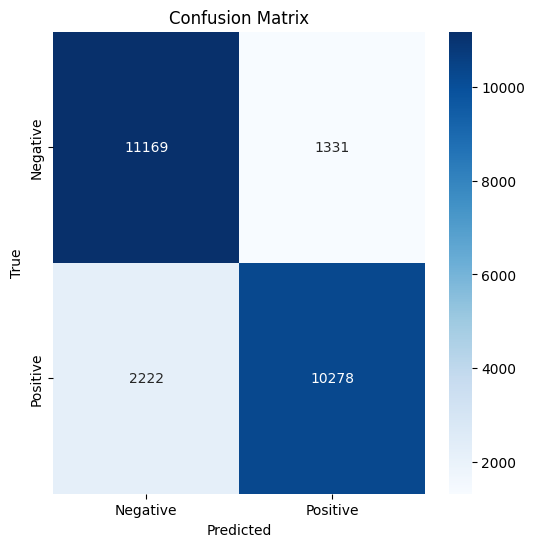

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the IMDB sentiment dataset
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

# 2. Preprocess the text data
# Padding sequences to make them of equal length
SEQ_LENGTH = 256
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, maxlen=SEQ_LENGTH)
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, maxlen=SEQ_LENGTH)

# 3. Build and compile the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=SEQ_LENGTH),
    tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Train the model
history = model.fit(train_data, train_labels, epochs=5, batch_size=64, validation_data=(test_data, test_labels))

# 5. Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

# 6. Make predictions on test data
predictions = (model.predict(test_data) > 0.5).astype("int32")

# 7. Generate confusion matrix and classification report
cm = confusion_matrix(test_labels, predictions)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(test_labels, predictions))

# 8. Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


